# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [ ]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

Then get our PortfolioOptimizer library and the necessary datasets from our repository

In [1]:
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/Japan_REITS_list.csv
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/JREIT_prices.csv    
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2019-02-23 06:28:22--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/Japan_REITS_list.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803 [text/plain]
Saving to: ‘Japan_REITS_list.csv.3’

Japan_REITS_list.cs 100%[===================>]     803  --.-KB/s    in 0s      

2019-02-23 06:28:22 (214 MB/s) - ‘Japan_REITS_list.csv.3’ saved [803/803]

--2019-02-23 06:28:22--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/JREIT_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101196 (99K) [text/plain]
Saving to: ‘JREIT_prices.csv.2’

JREIT_prices.csv.2  100

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PortfolioOptimizer import PortfolioOptimizer

In [3]:
stock_symbols = pd.read_csv('Japan_REITS_list.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [4]:
min_yield = 0

In [5]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [6]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [7]:
stocks = pd.read_csv('JREIT_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

If you want higher yield filter out using the filter previously created

In [8]:
stocks = stocks[highDivString]

### Method 2: Get prices from alphadvantage

Using the highDivString filter, download prices from alpadvantage

In [13]:
stocks = PortfolioOptimizer.get_stock_prices(highDivString)  

8953.TOK
3283.TOK
8960.TOK
8985.TOK
3281.TOK
sleeping
8963.TOK
3462.TOK
3292.TOK
3309.TOK
sleeping
8964.TOK
8961.TOK
3296.TOK
3473.TOK
sleeping
8898.TOK


In [17]:
stocks.to_csv('JREIT_prices.csv')

## Portfolio Optimization

In [9]:
weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0)

3292.TOK: 8.0%
3309.TOK: 10.0%
3296.TOK: 54.0%
3473.TOK: 28.000000000000004%
Sharpe: 1.34
Exp. Return: 15.63


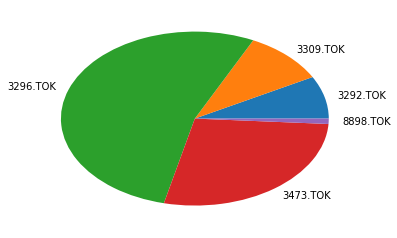

In [14]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Remove 0s and TOK string.

In [48]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())
portfolio = [s.replace('.TOK','') for s in portfolio]

### Resulting Portfolio

In [49]:
selected_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]
selected_stocks['Weight'] = portfoliovalues

In [50]:
 selected_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
7,2018/11/30,3292,AEON REIT Investment Corp,REIT,0.08,4.69
8,2018/11/30,3309,Sekisui House Reit Inc,REIT,0.10,4.11
11,2018/11/30,3296,Japan REIT,REIT,0.54,5.00
12,2018/11/30,3473,Sakura REIT,REIT,0.28,7.00
13,2018/11/30,8898,Century 21,REIT,0.01,4.00


In [58]:
Div_Yield = np.average(selected_stocks['Dividend'], weights=selected_stocks['Weight'])
round(Div_Yield, 2)

5.43